In [1]:
import quandl
import pandas as pd
import re
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [2]:
quandl.ApiConfig.api_key = 'es4ABcXZ_usFTxNf4mph'

In [ ]:
df=pd.read_csv('../1. Data Extraction & Cleaning/df.csv')

In [40]:
import statsmodels.api as sm

# Separate the target variable and predictors
target = df['RSNA']
predictors = df[['ZABT','ZSFH','NEWY636FIRE','CUURA101SAF11','CUURA101SS47016', 'MICH']]

# Add a constant column for the intercept
predictors = sm.add_constant(predictors)

# Fit the linear regression model
model = sm.OLS(target, predictors).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   RSNA   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     423.2
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           6.34e-53
Time:                        20:59:51   Log-Likelihood:                -378.24
No. Observations:                  77   AIC:                             770.5
Df Residuals:                      70   BIC:                             786.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3691.8570    394.239     

c:\users\johnson\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2629: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Appendix / Graveyard

### Rent (Zillow Research)

In [18]:
RSNA=pd.read_csv('../1. Data Extraction & Cleaning/RSNA.csv')

In [19]:
RSNA['date']=pd.to_datetime(RSNA['date'])

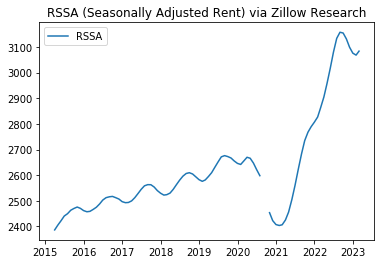

In [21]:
# Create a new plot
fig, ax = plt.subplots()

ax.plot(RSNA['date'], RSNA['RSNA'], label=name)

# Set the title and legend
ax.set_title('RSSA (Seasonally Adjusted Rent) via Zillow Research')
ax.legend()

# Display the plot
plt.show()

### Rent (Quandl)

In [12]:
region_ids = ['394913']
indicators = ['RSNA','RSSA']
data = quandl.get_table('ZILLOW/DATA', region_id=region_ids, indicator_id=indicators,paginate=True)

In [13]:
data

,indicator_id,region_id,date,value
None,,,,
0,RSSA,394913,2022-07-31,3055.0
1,RSSA,394913,2022-06-30,3014.0
2,RSSA,394913,2022-05-31,2973.0
3,RSSA,394913,2022-04-30,2909.0
4,RSSA,394913,2022-03-31,2952.0
5,RSSA,394913,2022-02-28,2870.0
6,RSSA,394913,2022-01-31,2832.0
7,RSSA,394913,2021-12-31,2796.0
8,RSSA,394913,2021-11-30,2760.0


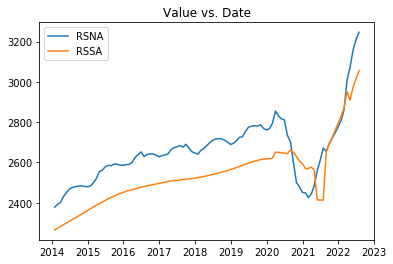

In [14]:
# Group the data by 'indicator_id'
grouped = data.groupby('indicator_id')

# Create a new plot
fig, ax = plt.subplots()

# Plot each group
for name, group in grouped:
    ax.plot(group['date'], group['value'], label=name)

# Set the title and legend
ax.set_title('Value vs. Date')
ax.legend()

# Display the plot
plt.show()

### Understanding New York State County Landscape

In [3]:
region_ids = ["581","1347","2452","2046","401","1252","3148","157","1223","2511","2465","1290","2515","823","2255","1283","2529","1946","895","1448","3004","3137","2900","1296","2748","1952","3249","2578","1343","2039","796","1610","1630","929","3088","2567","1909","1479","2961","2340","3066","2214","1298","1722","1024","2287","2979","748","2186","2224","1060","2119","2248","1954","2105","505","1373","2843","599","816","2533","2321"]
indicators = ['ZATT','ZSFH','ZABT']
data = quandl.get_table('ZILLOW/DATA', region_id=region_ids, indicator_id=indicators,paginate=True)

In [4]:
data

,indicator_id,region_id,date,value
None,,,,
0,ZSFH,929,2023-02-28,178562.107928
1,ZSFH,929,2023-01-31,178288.864926
2,ZSFH,929,2022-12-31,178606.813520
3,ZSFH,929,2022-11-30,179134.011443
4,ZSFH,929,2022-10-31,181313.000000
5,ZSFH,929,2022-09-30,180617.000000
6,ZSFH,929,2022-08-31,179272.000000
7,ZSFH,929,2022-07-31,177381.000000
8,ZSFH,929,2022-06-30,176564.000000


In [5]:
data.region_id=data.region_id.astype(int)
data.date=pd.to_datetime(data.date)

In [6]:
county_dict = {
    581: 'Kings County',
    1347: 'Queens County',
    2452: 'New York County',
    2046: 'Suffolk County',
    401: 'Bronx County',
    1252: 'Nassau County',
    3148: 'Westchester County',
    157: 'Erie County',
    1223: 'Monroe County',
    2511: 'Richmond County',
    2465: 'Onondaga County',
    1290: 'Orange County',
    2515: 'Rockland County',
    823: 'Albany County',
    2255: 'Dutchess County',
    1283: 'Oneida County',
    2529: 'Saratoga County',
    1946: 'Niagara County',
    895: 'Broome County',
    1448: 'Ulster County',
    3004: 'Rensselaer County',
    3137: 'Schenectady County',
    2900: 'Chautauqua County',
    1296: 'Oswego County',
    2748: 'Jefferson County',
    1952: 'Ontario County',
    3249: 'Saint Lawrence County',
    2578: 'Tompkins County',
    1343: 'Putnam County',
    2039: 'Steuben County',
    796: 'Wayne County',
    1610: 'Chemung County',
    1630: 'Clinton County',
    929: 'Cayuga County',
    3088: 'Cattaraugus County',
    2567: 'Sullivan County',
    1909: 'Madison County',
    1479: 'Warren County',
    2961: 'Livingston County',
    2340: 'Herkimer County',
    3066: 'Washington County',
    2214: 'Columbia County',
    1298: 'Otsego County',
    1722: 'Genesee County',
    1024: 'Fulton County',
    2287: 'Franklin County',
    2979: 'Montgomery County',
    748: 'Tioga County',
    2186: 'Chenango County',
    2224: 'Cortland County',
    1060: 'Greene County',
    2119: 'Allegany County',
    2248: 'Delaware County',
    1954: 'Orleans County',
    2105: 'Wyoming County',
    505: 'Essex County',
    1373: 'Seneca County',
    2843: 'Schoharie County',
    599: 'Lewis County',
    816: 'Yates County',
    2533: 'Schuyler County',
    2321: 'Hamilton County'
}


In [7]:
data['county']=data['region_id'].map(county_dict)

In [8]:
unique_ids = data['county'].unique()

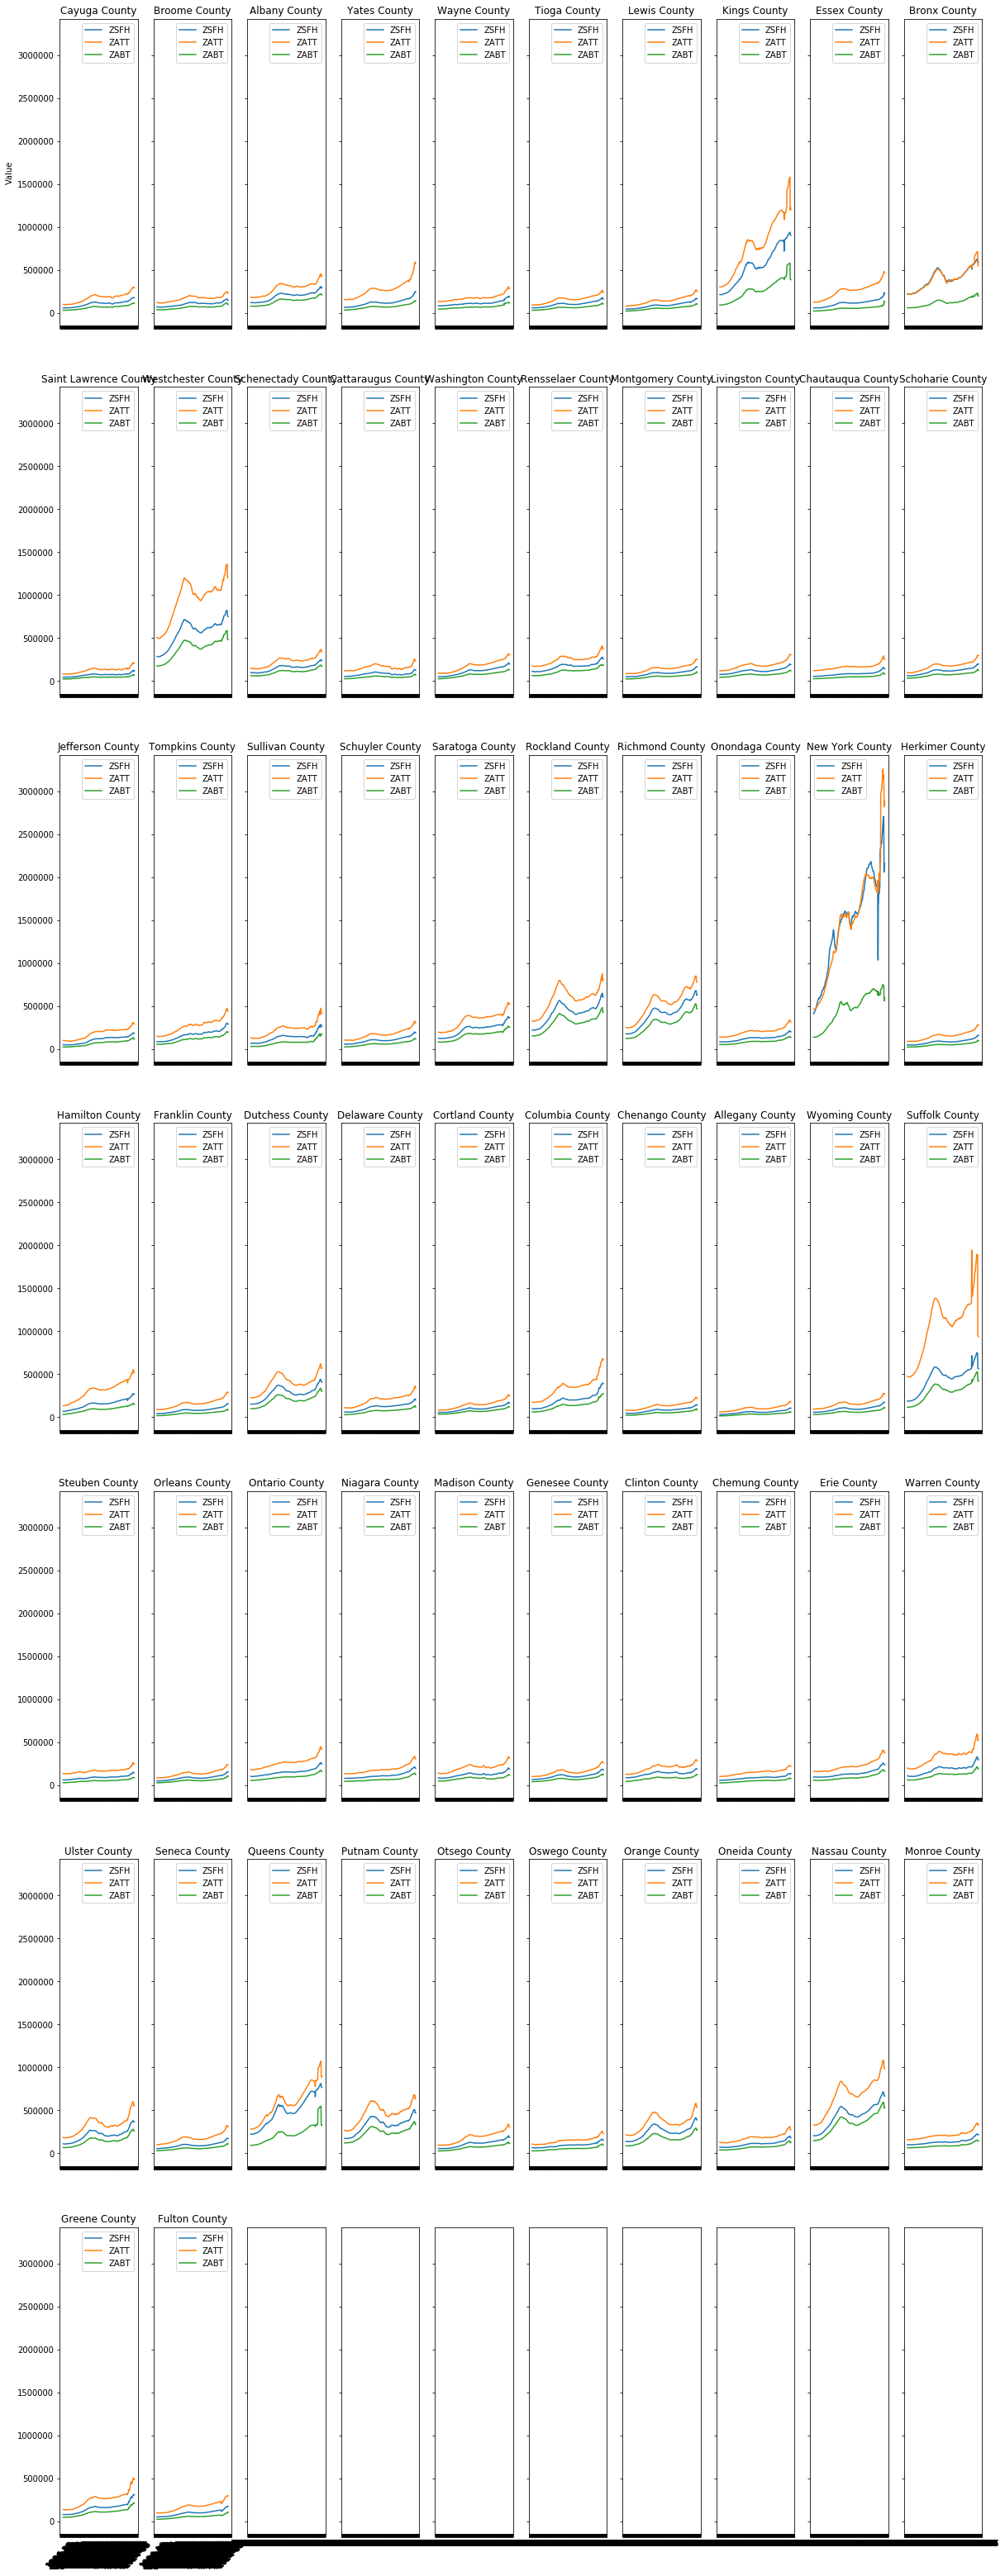

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set the number of plots per row and the width ratio for each subplot
plots_per_row = 10
width_ratios = [3]*plots_per_row

# Set up subplots with the appropriate number of rows and columns
num_plots = len(unique_ids)
num_rows = num_plots // plots_per_row + (num_plots % plots_per_row > 0)
fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(20, 8*num_rows), sharex=True, sharey=True, gridspec_kw={'width_ratios': width_ratios})

# Loop through unique IDs and plot data
for i, id in enumerate(unique_ids):
    # Filter DataFrame for current id
    id_df = data[data['county'] == id]
    
    # Determine row and column index for the current plot
    row_idx = i // plots_per_row
    col_idx = i % plots_per_row
    
    # Plot each region_id for the current id on the appropriate subplot
    for region_id in id_df['indicator_id'].unique():
        region_df = id_df[id_df['indicator_id'] == region_id]
        axs[row_idx, col_idx].plot(region_df['date'], region_df['value'], label=region_id)
    
    # Set title and legend for the subplot
    axs[row_idx, col_idx].set_title(f'{id}')
    axs[row_idx, col_idx].legend()
    
    # Set tick frequency and/or tick label rotation for the x-axis
    axs[row_idx, col_idx].tick_params(axis='x', which='major', labelrotation=45)
    axs[row_idx, col_idx].xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Set y-axis label for the first subplot of the first row
axs[0, 0].set_ylabel('Value')

# Display the plot
plt.show()


c:\users\johnson\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


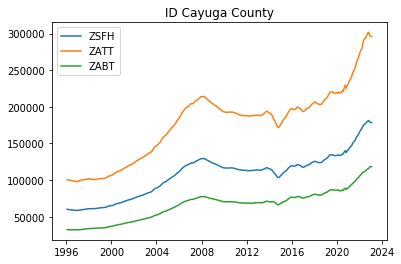

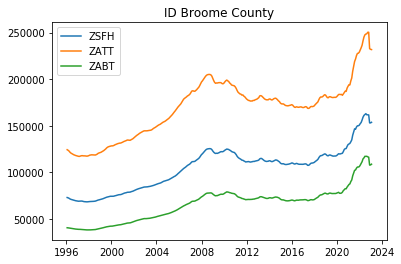

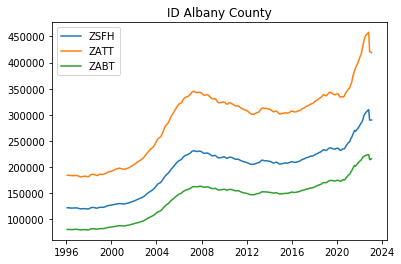

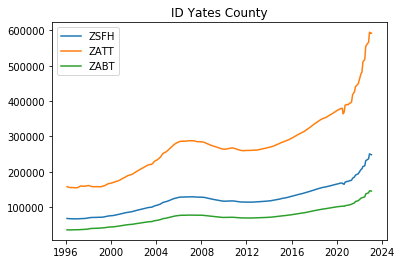

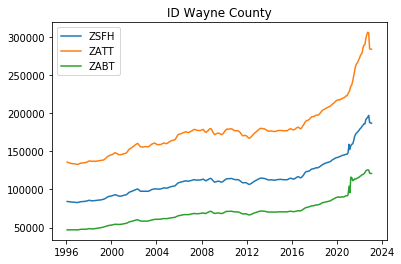

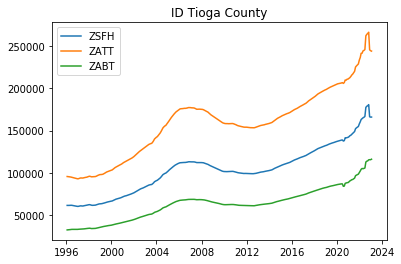

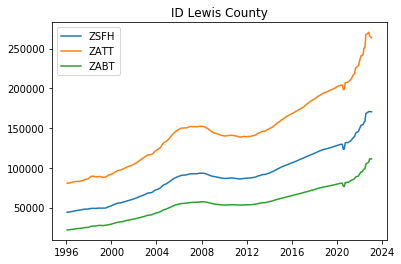

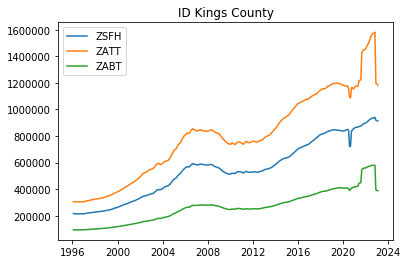

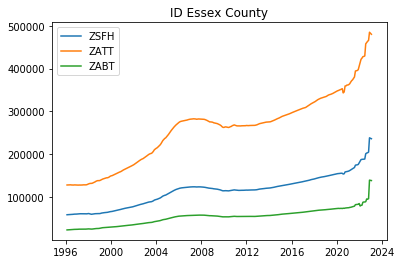

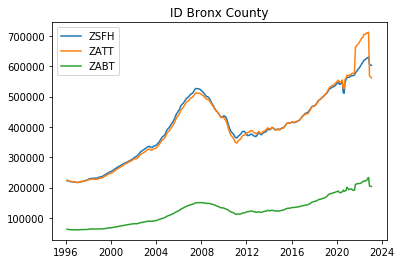

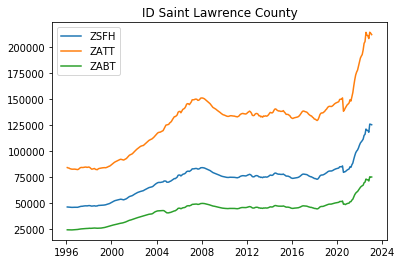

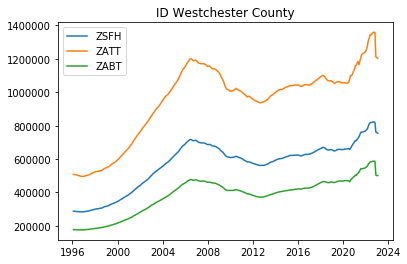

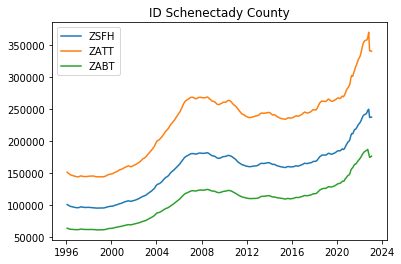

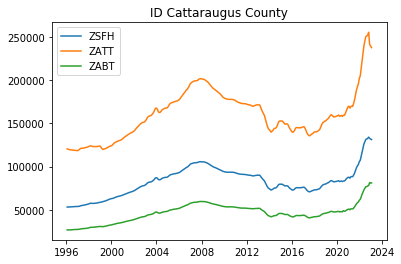

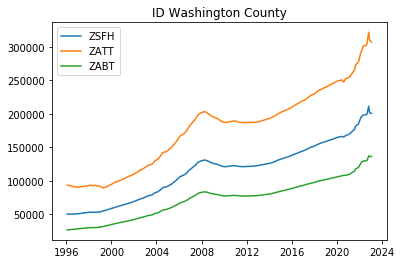

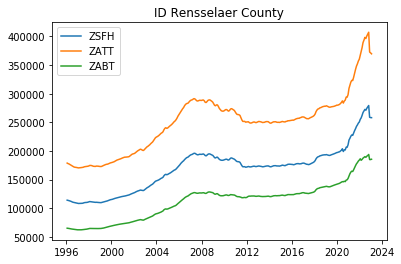

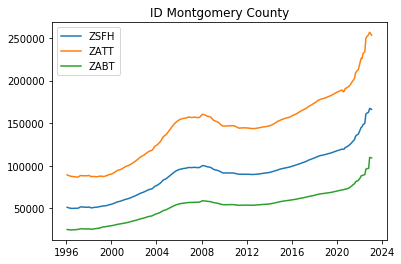

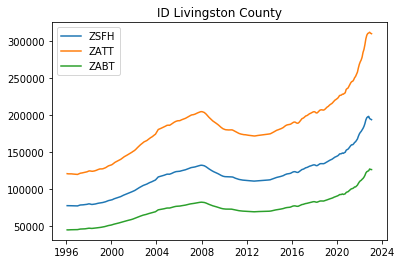

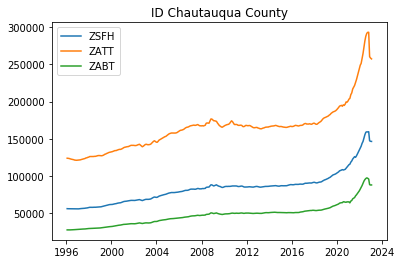

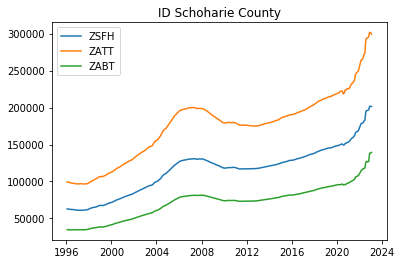

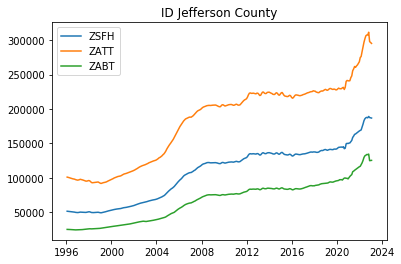

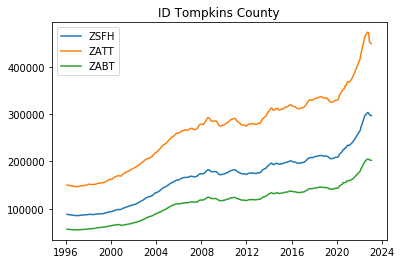

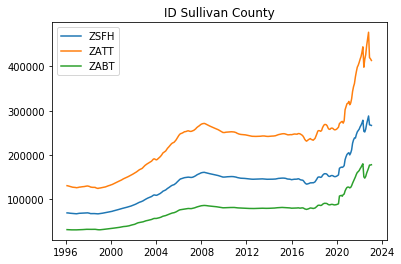

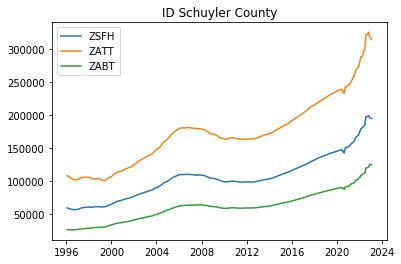

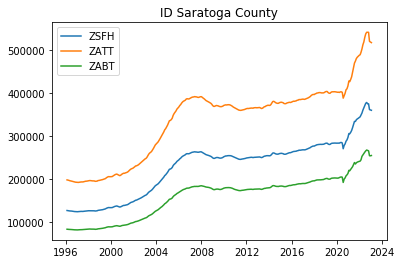

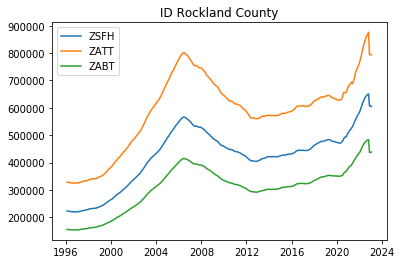

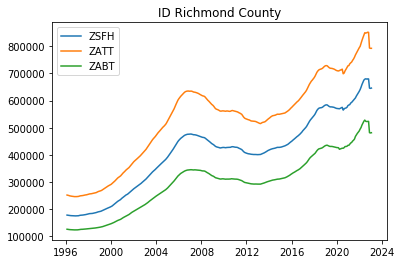

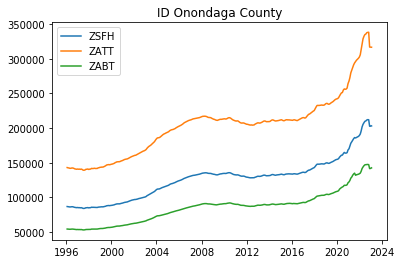

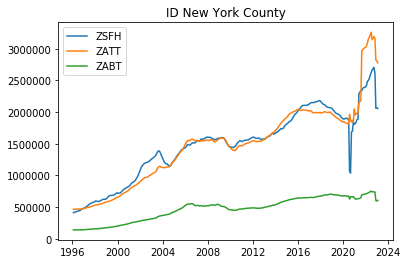

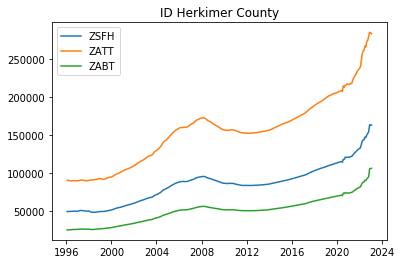

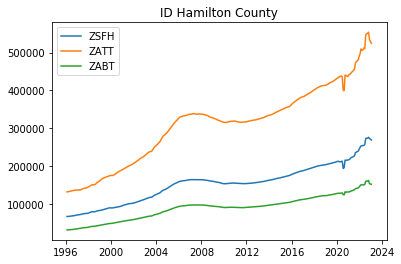

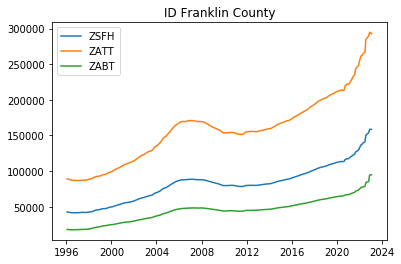

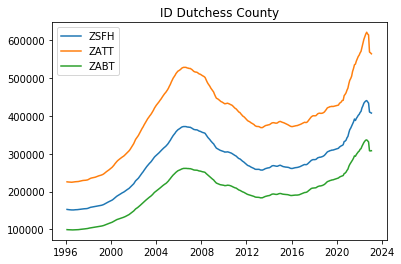

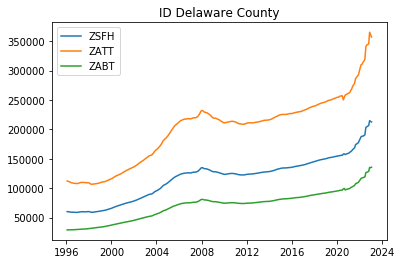

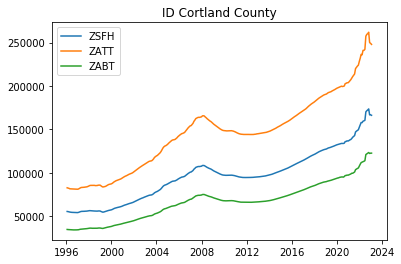

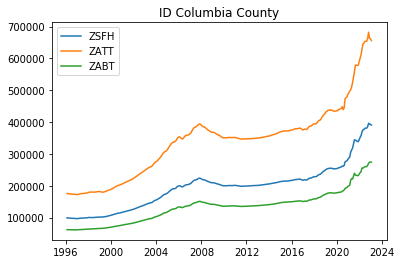

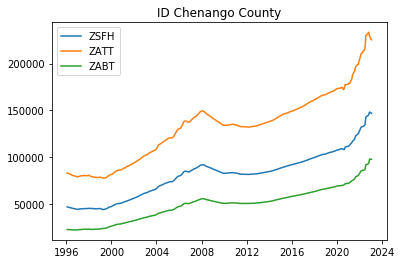

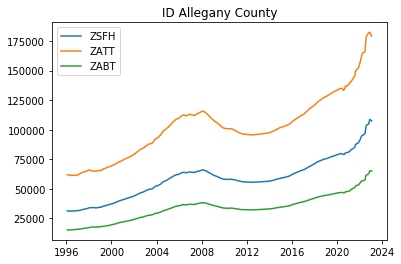

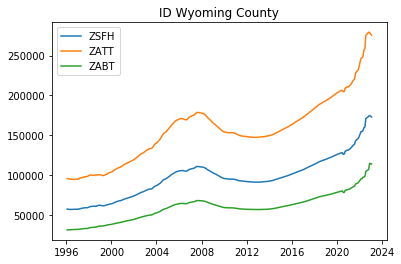

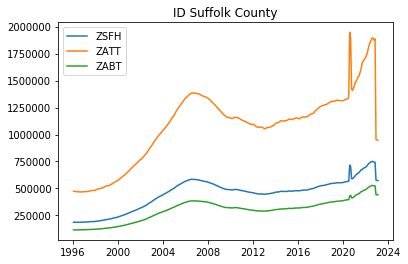

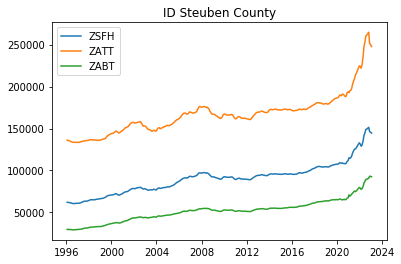

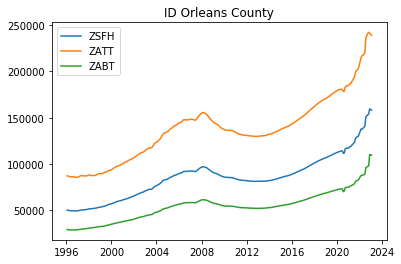

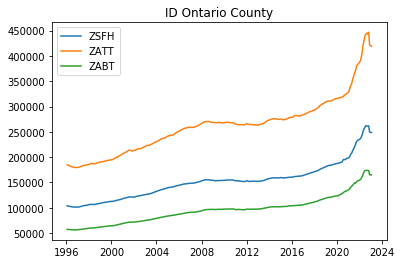

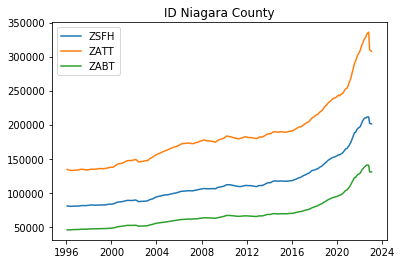

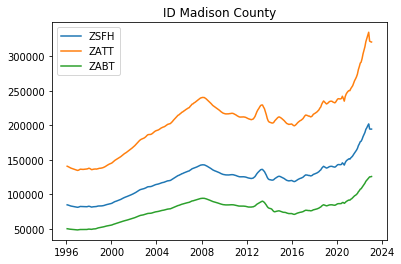

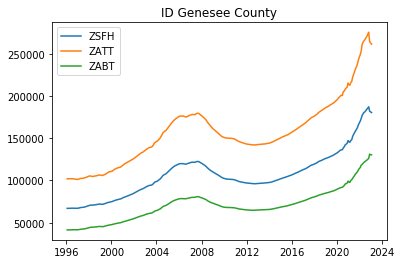

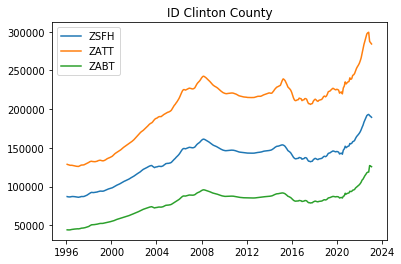

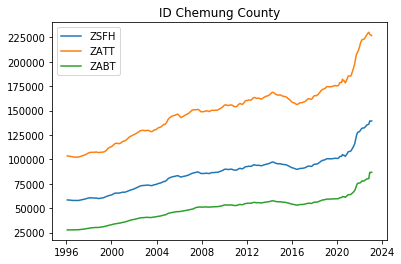

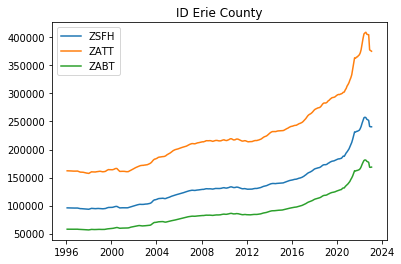

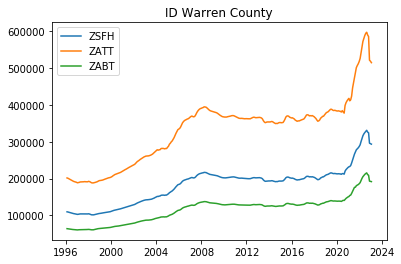

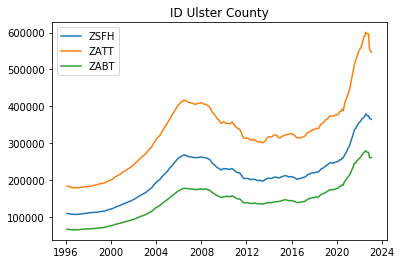

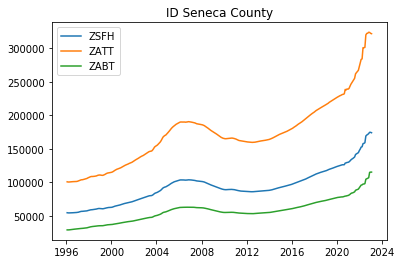

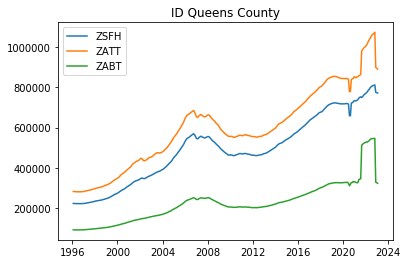

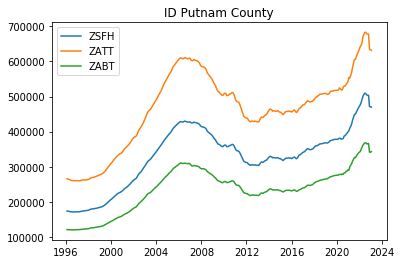

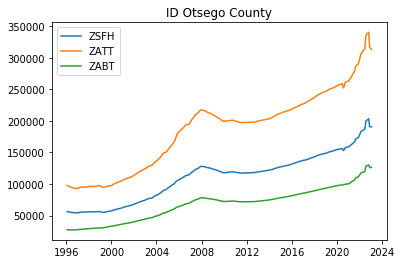

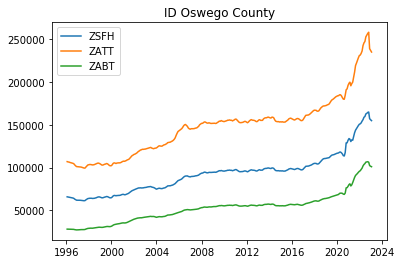

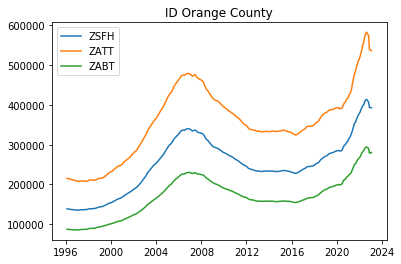

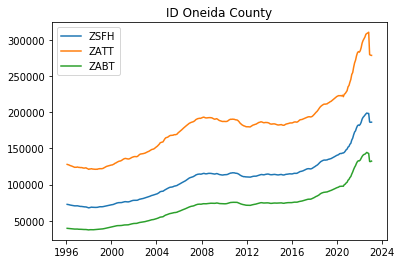

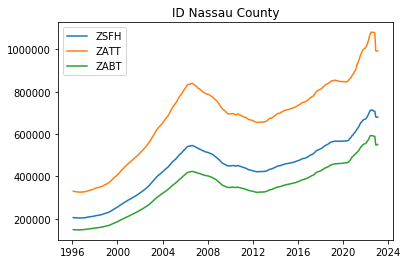

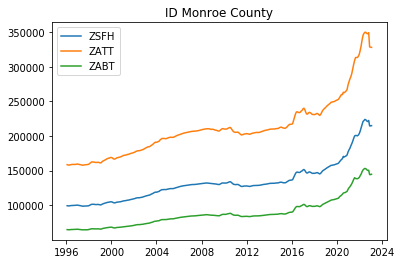

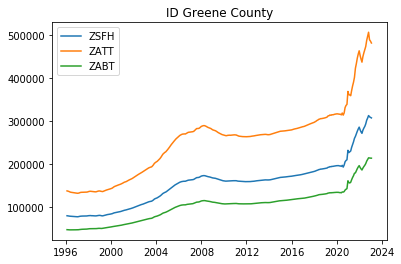

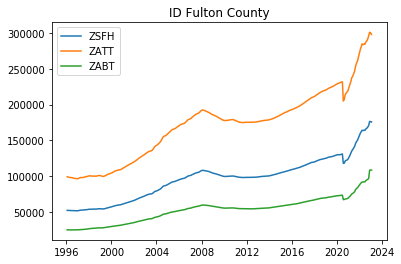

In [10]:
for id in unique_ids:
    # filter DataFrame for current id
    id_df = data[data['county'] == id]
    
    # create a new plot
    fig, ax = plt.subplots()
    
    # plot each region_id for the current id
    for region_id in id_df['indicator_id'].unique():
        region_df = id_df[id_df['indicator_id'] == region_id]
        ax.plot(region_df['date'], region_df['value'], label=region_id)
    
    # set title and legend
    ax.set_title(f'ID {id}')
    ax.legend()
    
    # show the plot
    plt.show()

### Appendix

#### FRED Lookup Key

In [ ]:
# Population
``````````````: Population Annually, ### Back fill
# Hosuing Metrics
ACTLISCOU35620: Housing Inventory: Active Listing Count Monthly (1 Month Lagged | 2nd Update)
NEWLISCOU35620: Housing Inventory: New Listing Count Monthly (1 Month Lagged | 2nd Update)
PENLISCOU35620: Pending Listing Count Monthly (1 Month Lagged | 2nd Update)
PRIREDCOU35620: Housing Inventory: Price Reduced Count (1 Month Lagged | 2nd Update)
NEWY636BPPRIV: New Private Housing Structures Authorized by Building Permits Monhtly (1 Month Lagged | 24th Update)
# BLS + FRED Employement
SMU36356204200000001: All Employees: Retail Trade Monthly (2 Month Lagged | 14th Update)
SMU36356200500000001SA: All Employees: Total Private Monthly (2 Month Lagged | 14th Update)
SMU36356204300000001SA: All Employees: Transportation and Utilities: Transportation, Warehousing, and Utilities Monthly (2 Month Lagged | 14th Update) 
# Wage
ENUC356230010SA: Total Quarterly Wages Quarterly (3 Month Lagged | 8th Update)
NEWY636PCPI: Per Capita Personal Income Annually, (12 Month Lagged | Nov 16th Update)
SMU36356200500000003: Average Hourly Earnings of All Employees: Total Private Monthly (2 Month Lagged | 14th Update)
SMU36356200500000002: Average Weekly Hours of All Employees: Total Private Monthly (2 Month Lagged | 14th Update)
SMU36356200500000011: Average Weekly Earnings of All Employees: Total Private Monthly (2 Month Lagged | 14th Update)
## US Labor Employment    
LAUMT363562000000005: Employed Persons Monthly (2 Month Lagged | 17th Update)
NEWY636URN:Unemployment Monthly (2 Month Lagged | 17th Update)
NEWY636NA: All Employees: Total Nonfarm Monthly (2 Month Lagged | 14th Update)
NEWY636LFN: Civilian Labor Force Monthly (2 Month Lagged | 17th Update)
NEWY636NRMN: All Employees: Mining, Logging, and Construction Monthly (2 Month Lagged | 14th Update)
NEWY636PBSV: All Employees: Professional and Business Services Monthly (2 Month Lagged | 14th Update)
NEWY636FIRE: All Employees: Financial Activities Monthly (2 Month Lagged | 14th Update)
NEWY636MFG: All Employees: Manufacturing Monthly (2 Month Lagged | 14th Update)
NEWY636EDUH: All Employees: Education and Health Services Monthly (2 Month Lagged | 14th Update)
NEWY636LEIH: All Employees: Leisure and Hospitality Monthly (2 Month Lagged | 14th Update)
# CPI
https://fred.stlouisfed.org/categories/32869?t=monthly&ob=pv&od=desc   

In [ ]:
CUURA101SA0: All Items (1 Month Lagged | 14th Update)
CUURA101SAF11: Food at Home (1 Month Lagged | 14th Update)
CUURA101SAF: Food and Beverages (1 Month Lagged | 14th Update)
CUURA101SA0E: Energy (1 Month Lagged | 14th Update)
CUURA101SEHF01: Electricity (1 Month Lagged | 14th Update)
CUURA101SAT: Transportation (1 Month Lagged | 14th Update)
CUURA101SAM: Medical Care (1 Month Lagged | 14th Update)
CUURA101SAR: Recreation (1 Month Lagged | 14th Update)
CUURA101SAF116: Acholic Beverage (1 Month Lagged | 14th Update)
CUURA101SAA: Apparel (1 Month Lagged | 14th Update)
CUURA101SANL1: Non Durable less food (1 Month Lagged | 14th Update)
CUURA101SS47016: Unleaded Premium (1 Month Lagged | 14th Update)

In [ ]:
PSAVERT: Personal Saving Rate (1 Month Lagged | 24th Update)
MICH: University of Michigan: Inflation Expectation (1 Month Lagged | 24th Update)
FEDFUNDS: Federal Funds Effective Rate (1 Month Lagged | 1st Update)
T10Y2Y: 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity (Daily)
T10Y3M: 10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity (Daily)